<a href="https://colab.research.google.com/github/Rudransh3/GPD_1/blob/main/GPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-26-3f339437df40>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
[*********************100%%**********************]  1 of 1 completed


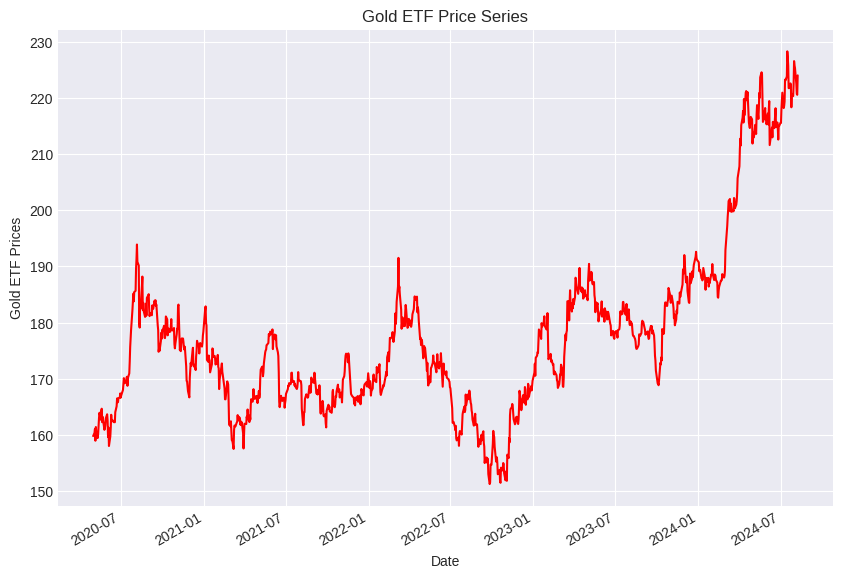

Linear Regression model
Price (y) = 1.22 * 3 Day Moving Average (x1) + -0.22 * 9 Day Moving Average (x2) + 1.22 (constant)


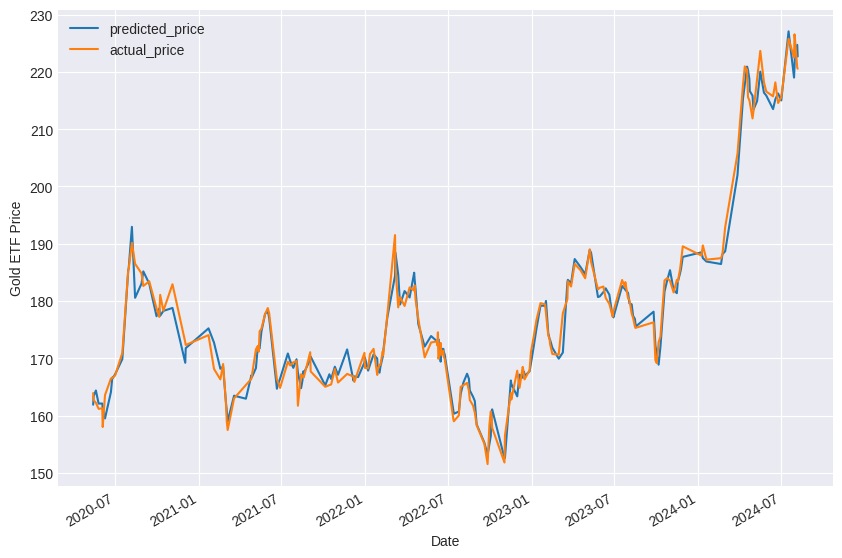

Date,2024-08-07
signal,No Position
predicted_gold_price,220.685135


In [26]:
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import yfinance as yf

import datetime as dt
current_date = dt.datetime.now()

Df = yf.download('GLD', '2020-05-01', '2024-08-09', auto_adjust=True)
Df = Df[['Close']]
Df = Df.dropna()

Df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

# Define explanatory variables
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

#dropping all Nan values
Df = Df.dropna()
X = Df[['S_3', 'S_9']]

# Define dependent variable
y = Df['next_day_price']

#splitting into test and train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

#explaining the equation used for our model
print("Linear Regression model")
print("Price (y) = %.2f * 3 Day Moving Average (x1) \
+ %.2f * 9 Day Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

# R square to check our error rate
r2_score = linear.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

# Forecast the price
Df['predicted_gold_price'] = linear.predict(Df[['S_3', 'S_9']])
Df['signal'] = np.where(Df.predicted_gold_price.shift(1) < Df.predicted_gold_price,"Buy","No Position")

# Print the forecast
Df.tail(1)[['signal','predicted_gold_price']].T

In [27]:
from sklearn.metrics import mean_squared_error

# Calculate the accuracy of directional predictions
correct_direction = np.sign(predicted_price['price'].diff()) == np.sign(y_test.diff())
accuracy = correct_direction.mean() * 100
print(f"Accuracy of directional prediction: {accuracy:.2f}%")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_price))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")


Accuracy of directional prediction: 93.46%
Root Mean Square Error (RMSE): 2.13


In [29]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the cross-validation procedure
kf = KFold(n_splits=15, shuffle=True, random_state=0)

# Define a custom scoring function for RMSE
def rmse_scorer(estimator, X, y):
    predictions = estimator.predict(X)
    return np.sqrt(mean_squared_error(y, predictions))

# Perform cross-validation
cv_results = cross_val_score(linear, X, y, cv=kf, scoring=rmse_scorer)

# Calculate mean RMSE and standard deviation
mean_rmse = cv_results.mean()
std_rmse = cv_results.std()

# Compute mean of actual values for accuracy calculation
mean_actual = np.mean(y)

# Calculate accuracy
accuracy_percentage = 100 - (mean_rmse / mean_actual * 100)

# Output cross-validation results
print(f"Cross-Validation RMSE Scores: {cv_results}")
print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Standard Deviation of RMSE: {std_rmse:.2f}")
print(f"Model Accuracy Percentage: {accuracy_percentage:.2f}%")


Cross-Validation RMSE Scores: [1.9766119  2.18688142 2.2273282  1.97680658 1.92082065 2.11926339
 2.1113587  2.28778758 1.90555616 1.77080042 2.04235765 2.45570422
 2.05347624 1.4202663  1.88014741]
Mean RMSE: 2.02
Standard Deviation of RMSE: 0.23
Model Accuracy Percentage: 98.86%


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0422
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


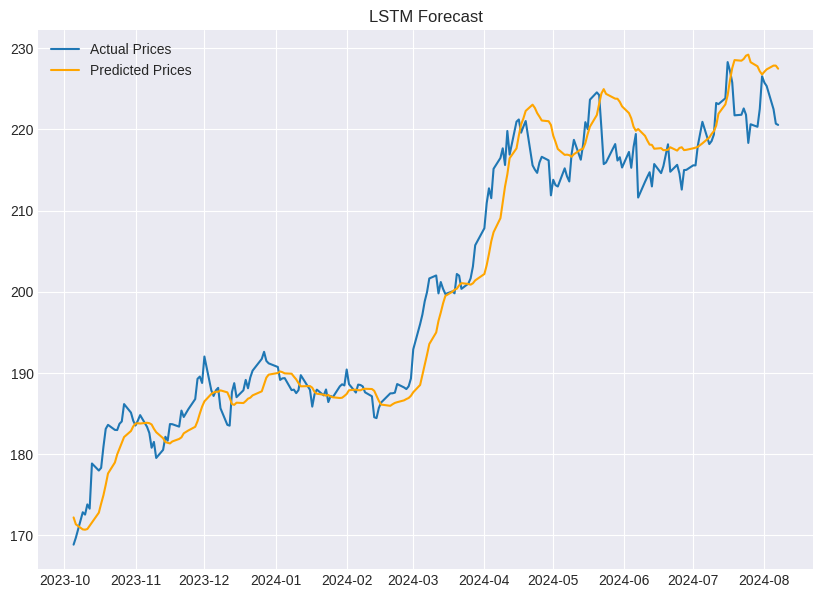

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Df[['Close']])

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

# Split the data
X_train, X_test = X[:-int(0.2*len(X))], X[-int(0.2*len(X)):]
y_train, y_test = y[:-int(0.2*len(y))], y[-int(0.2*len(y)):]

# Build and train the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(10, 7))
plt.plot(Df.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(Df.index[-len(y_test):], y_pred, label='Predicted Prices', color='orange')
plt.legend()
plt.title('LSTM Forecast')
plt.show()


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming y_test and y_pred are already defined
# Reshape y_test and y_pred if necessary
y_test_reshaped = y_test.reshape(-1, 1) if len(y_test.shape) == 1 else y_test
y_pred_reshaped = y_pred.reshape(-1, 1) if len(y_pred.shape) == 1 else y_pred

# Inverse transform using the same scaler
y_test_actual = scaler.inverse_transform(y_test_reshaped)
y_pred_actual = scaler.inverse_transform(y_pred_reshaped)

# Calculate RMSE and MAE
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae_lstm = mean_absolute_error(y_test_actual, y_pred_actual)


mean_actual = np.mean(y_test_actual)
print(f"Mean of Actual Values: {mean_actual:.2f}")

accuracy_percentage = 100 - (mae_lstm / mean_actual * 100)

print(f"LSTM Model RMSE: {rmse_lstm:.2f}")
print(f"LSTM Model MAE: {mae_lstm:.2f}")
print(f"LSTM Model Accuracy Percentage: {accuracy_percentage:.2f}%")


Mean of Actual Values: 15621.82
LSTM Model RMSE: 301.96
LSTM Model MAE: 234.61
LSTM Model Accuracy Percentage: 98.50%


In [37]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1109
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2070.526
Date:                Mon, 19 Aug 2024   AIC                           4153.052
Time:                        16:37:47   BIC                           4183.114
Sample:                    05-13-2020   HQIC                          4164.421
                         - 08-12-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0076      0.031     -0.250      0.802      -0.067       0.052
ar.L2         -0.0479      0.025     -1.891      0.059      -0.098       0.002
ar.L3          0.0158      0.030      0.534      0.5

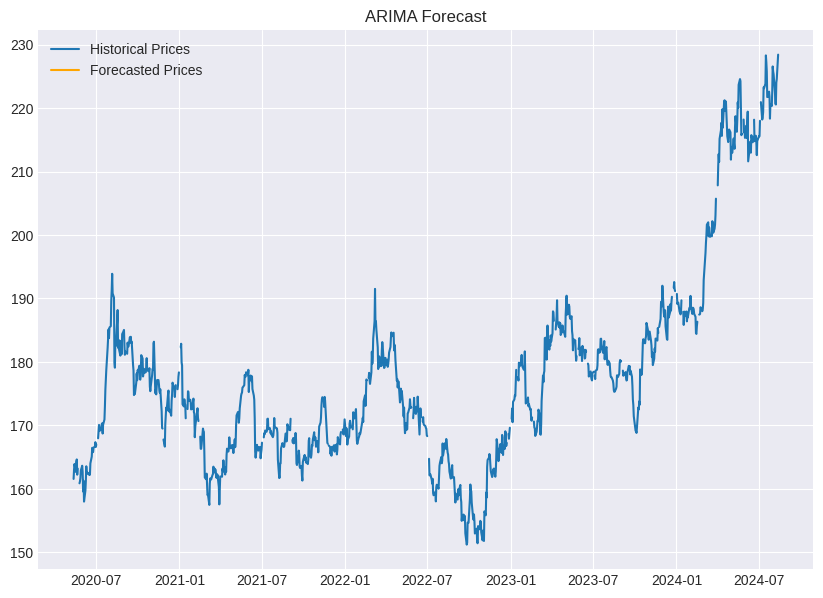

[*********************100%%**********************]  1 of 1 completed

ARIMA Model RMSE: 2.04
ARIMA Model MAE: 1.51
ARIMA Model Accuracy Percentage: 99.34%


In [40]:
# Define and fit the ARIMA model
model = ARIMA(series, order=(5, 1, 0))  # Example order, adjust as needed
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plot
plt.figure(figsize=(10, 7))
plt.plot(series, label='Historical Prices')
plt.plot(forecast_df, label='Forecasted Prices', color='orange')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

# Calculate RMSE and MAE for the forecast
# To compare with actual future values, you need to replace this with real future values if available
# Here we are simulating this part, in practice, use real future values
try:
    # Fetch actual future values
    actual_future_values = yf.download('GLD', '2024-08-10', '2024-08-19', auto_adjust=True)['Close'].values

    # Check if lengths match
    if len(forecast) != len(actual_future_values):
        raise ValueError("Length of forecast values and actual future values do not match.")

    # Calculate RMSE and MAE
    rmse_arima = np.sqrt(mean_squared_error(actual_future_values, forecast))
    mae_arima = mean_absolute_error(actual_future_values, forecast)

    # Calculate accuracy percentage
    mean_actual = np.mean(actual_future_values)
    accuracy_percentage = 100 - (mae_arima / mean_actual * 100)

    print(f"ARIMA Model RMSE: {rmse_arima:.2f}")
    print(f"ARIMA Model MAE: {mae_arima:.2f}")
    print(f"ARIMA Model Accuracy Percentage: {accuracy_percentage:.2f}%")

except Exception as e:
    print(f"Error in evaluating the forecast: {e}")